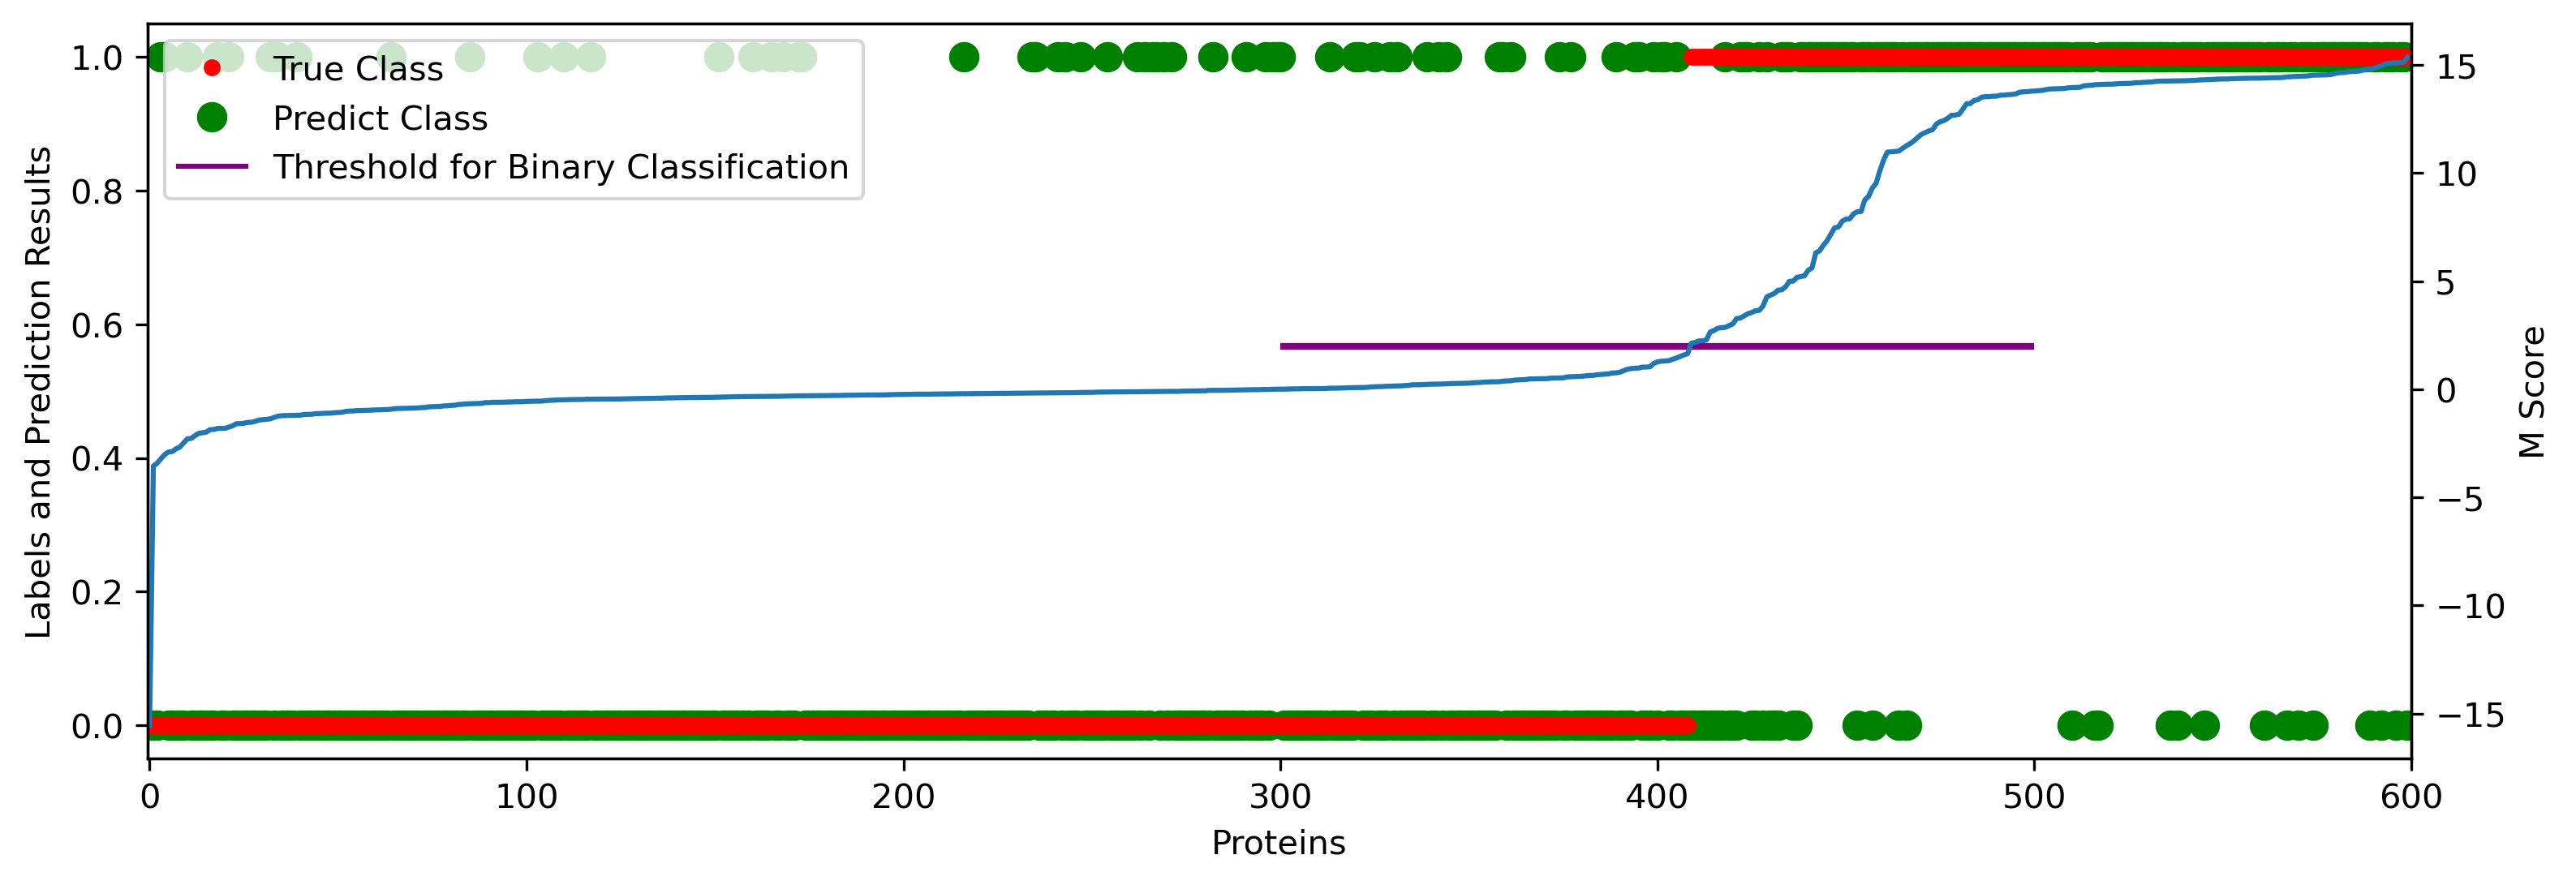

In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

target_protein = 'AAL (100 ug/ml)'
target_result_file = 'Results/eval-EXP-20201129-195018-model.pkl'
a = pickle.load(open(target_result_file, 'rb'))

y_iupac = a['y_iupac']
y_true = a['y_label']
y_pred = a['y_pred']
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [12.0, 4.0]

iupac_data = pd.read_csv('./Data/IUPAC.csv')
iupacs = iupac_data['IUPAC'].tolist()
mscore_data = pd.read_csv('./Data/MScore_useful.csv')
mscore = mscore_data[target_protein].tolist()

cv_order = sorted(list(zip(y_iupac, y_true, y_pred)))
excel_order = sorted(list(zip(iupacs, mscore)))

iupacs, y_true, y_pred = list(zip(*cv_order))
_, mscore = list(zip(*excel_order))

pack = sorted(list(zip(mscore, y_true, y_pred, iupacs)))
mscore, y_true, y_pred, iupacs = list(zip(*pack))

subject_range = range(len(y_true))
fig, ax1 = plt.subplots()
ax1.plot(subject_range, y_true, "ro", markersize=4, zorder=3, label="True Class")
ax1.plot(subject_range, y_pred, "go", markersize=8, zorder=2, label="Predict Class")
ax1.set_xlim([-0.5, len(y_true)])
ax1.set_xlabel("Proteins")
ax1.set_ylabel("Labels and Prediction Results")

ax2 = ax1.twinx()
ax2.plot(subject_range, mscore, label="M Score")
ax2.set_ylabel("M Score")
ax2.hlines(y=2.0, xmin=300, xmax=500, colors='purple', linestyles='-', lw=2, label='Threshold for Binary Classification')
# ax2.legend(loc="upper left")
# To combine two legend together
ax1.plot(np.nan, color='purple', label='Threshold for Binary Classification')
ax1.legend(loc="upper left")

plt.show()


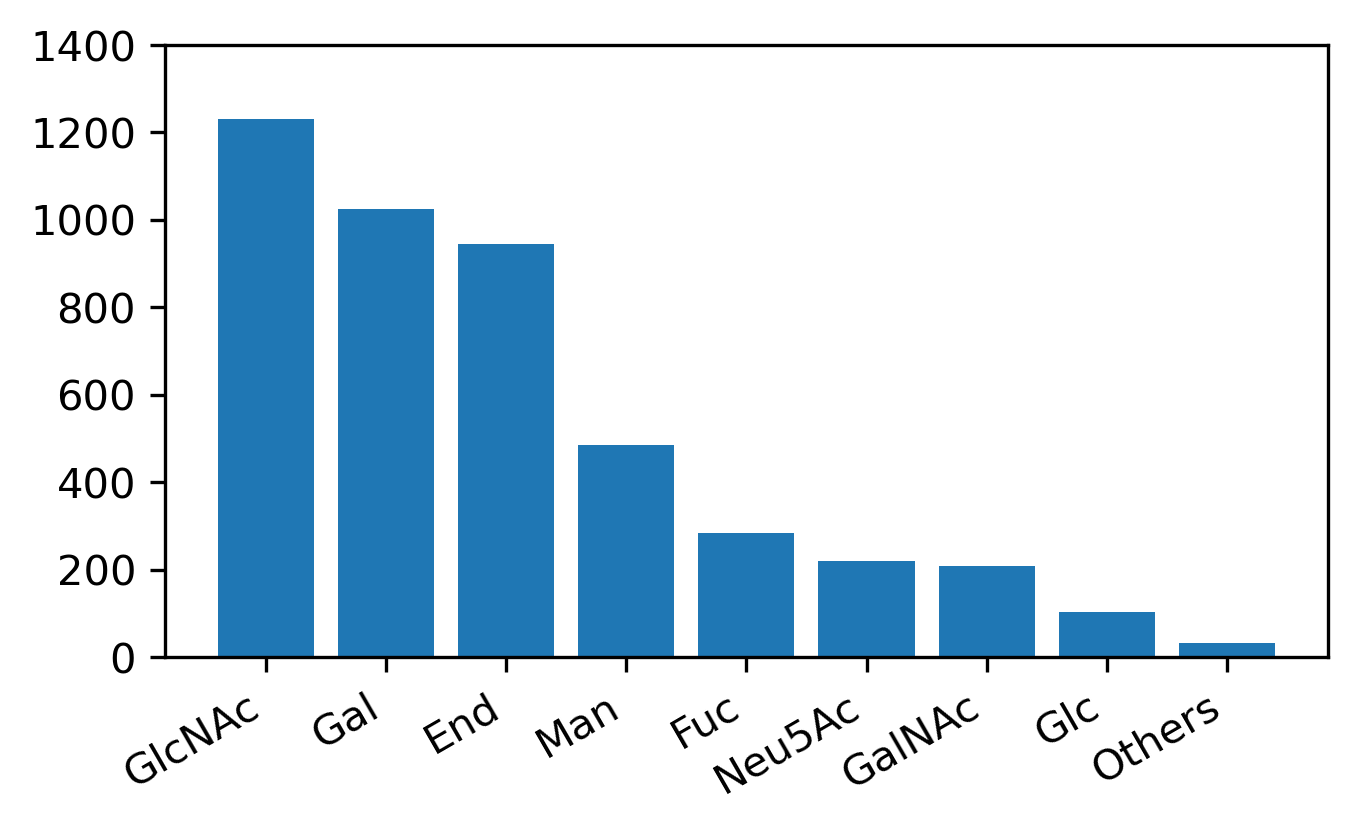

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Draw Bar Chart for monos
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (5, 3)


column_label = ['GlcNAc', 'Gal', 'End', 'Man', 'Fuc', 'Neu5Ac', 'GalNAc', 'Glc', 'Others']
occurrence = [1230, 1026, 945, 485, 283, 220, 208, 103, 32]
x = np.arange(len(column_label))

fig, ax = plt.subplots()
ax.bar(x, occurrence)
ax.set_xticks(x)
ax.set_xticklabels(column_label)
fig.autofmt_xdate()
plt.ylim([0, 1400])

plt.show()


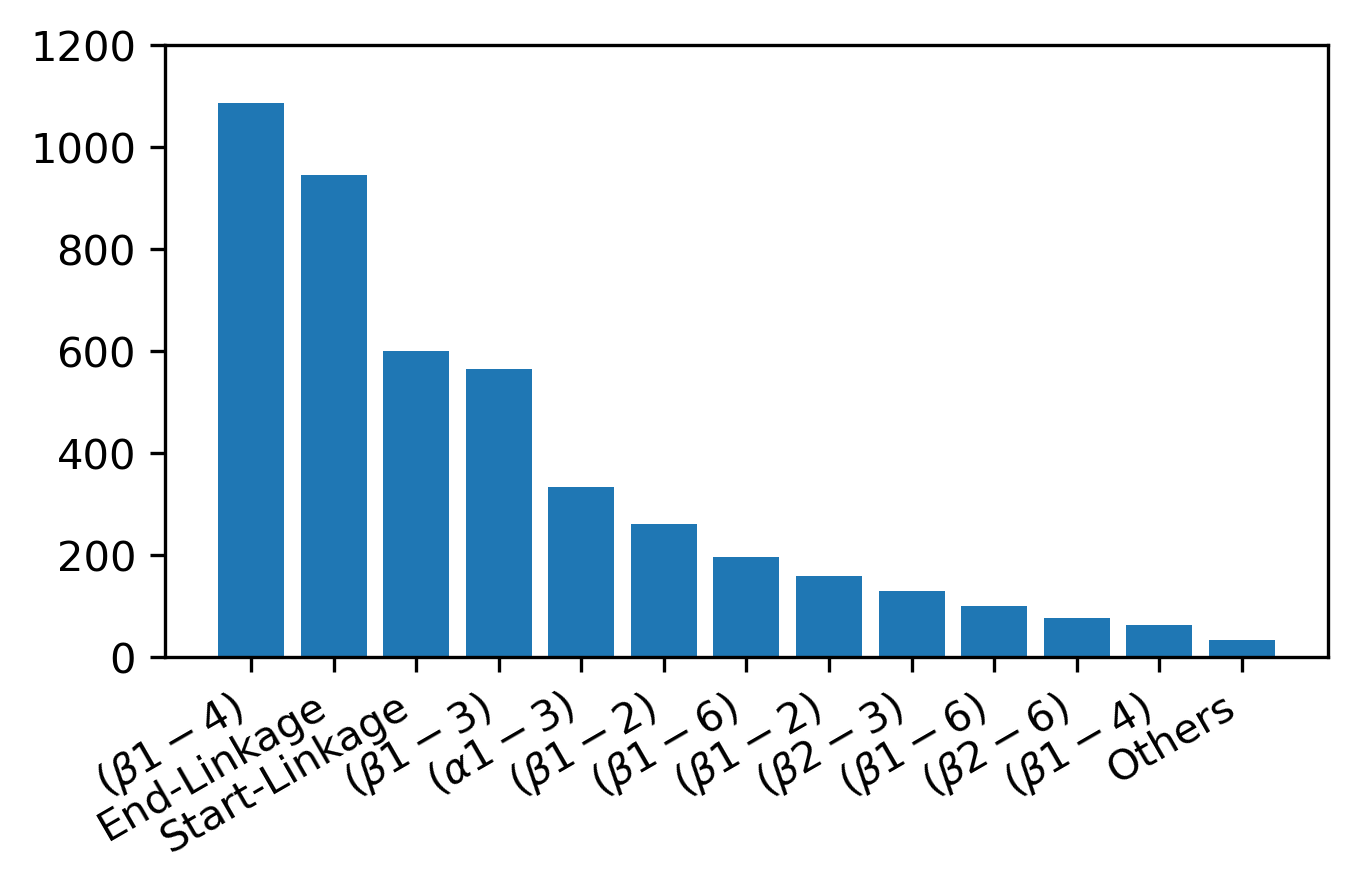

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Draw Bar Chart for links
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (5, 3)


column_label = [r'$(\beta 1-4)$', 'End-Linkage', 'Start-Linkage', r'$(\beta 1-3)$', r'$(\alpha 1-3)$', r'$(\beta 1-2)$', r'$(\beta 1-6)$', r'$(\beta 1-2)$', r'$(\beta 2-3)$', r'$(\beta 1-6)$', r'$(\beta 2-6)$', r'$(\beta 1-4)$', 'Others']
occurrence = [1086, 945, 600, 564, 332, 261, 196, 159, 129, 99, 76, 63, 32]
x = np.arange(len(column_label))

fig, ax = plt.subplots()
ax.bar(x, occurrence)
ax.set_xticks(x)
ax.set_xticklabels(column_label)
fig.autofmt_xdate()
plt.ylim([0, 1200])

plt.show()

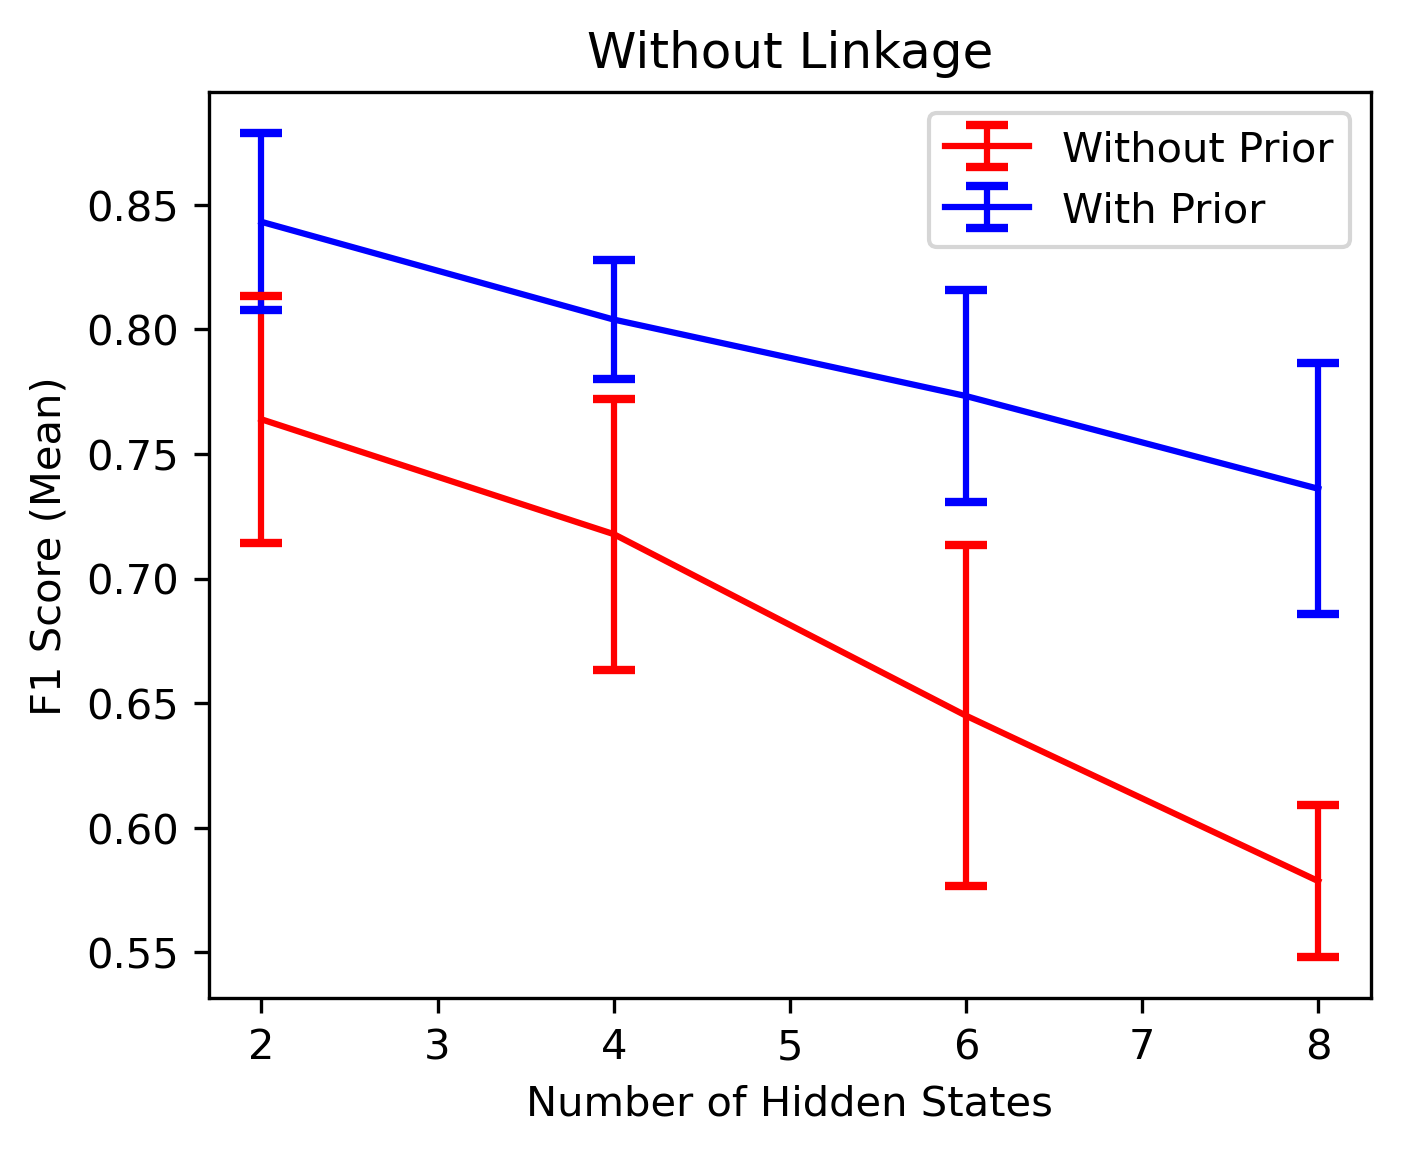

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

h2 = pickle.load(open('Saved/2-Class/eval-states_2_folds_5-20201202-171820-model.pkl', 'rb'))['Metrics']
h4 = pickle.load(open('Saved/2-Class/eval-states_4_folds_5-20201202-171820-model.pkl', 'rb'))['Metrics']
h6 = pickle.load(open('Saved/2-Class/eval-states_6_folds_5-20201202-171820-model.pkl', 'rb'))['Metrics']
h8 = pickle.load(open('Saved/2-Class/eval-states_8_folds_5-20201202-171820-model.pkl', 'rb'))['Metrics']

h2_f1 = h2['Normal']['F1'][4][0]
h2_prior_f1 = h2['Posterior']['F1'][4][0]
h4_f1 = h4['Normal']['F1'][4][0]
h4_prior_f1 = h4['Posterior']['F1'][4][0]
h6_f1 = h6['Normal']['F1'][4][0]
h6_prior_f1 = h6['Posterior']['F1'][4][0]
h8_f1 = h8['Normal']['F1'][4][0]
h8_prior_f1 = h8['Posterior']['F1'][4][0]

h2_f1_error = h2['Normal']['F1'][4][1] * 0.87653
h2_prior_f1_error = h2['Posterior']['F1'][4][1] * 0.87653
h4_f1_error = h4['Normal']['F1'][4][1] * 0.87653
h4_prior_f1_error = h4['Posterior']['F1'][4][1] * 0.87653
h6_f1_error = h6['Normal']['F1'][4][1] * 0.87653
h6_prior_f1_error = h6['Posterior']['F1'][4][1] * 0.87653
h8_f1_error = h8['Normal']['F1'][4][1] * 0.87653
h8_prior_f1_error = h8['Posterior']['F1'][4][1] * 0.87653


states = [2, 4, 6, 8]
f1s = [h2_f1, h4_f1, h6_f1, h8_f1]
f1s_error = [h2_f1_error, h4_f1_error, h6_f1_error, h8_f1_error]
f1s_prior = [h2_prior_f1, h4_prior_f1, h6_prior_f1, h8_prior_f1]
f1s_prior_error = [h2_prior_f1_error, h4_prior_f1_error, h6_prior_f1_error, h8_prior_f1_error]

plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["errorbar.capsize"] = 5

plt.figure()
plt.errorbar(states, f1s, yerr=f1s_error, color='red', ecolor='red', capthick=2, label='Without Prior')
plt.errorbar(states, f1s_prior, yerr=f1s_prior_error, color='blue', ecolor='blue', capthick=2, label='With Prior')
plt.xticks(range(2, 9))
plt.xlabel('Number of Hidden States')
plt.ylabel('F1 Score (Mean)')
plt.title('Without Linkage')
plt.legend()
plt.show()

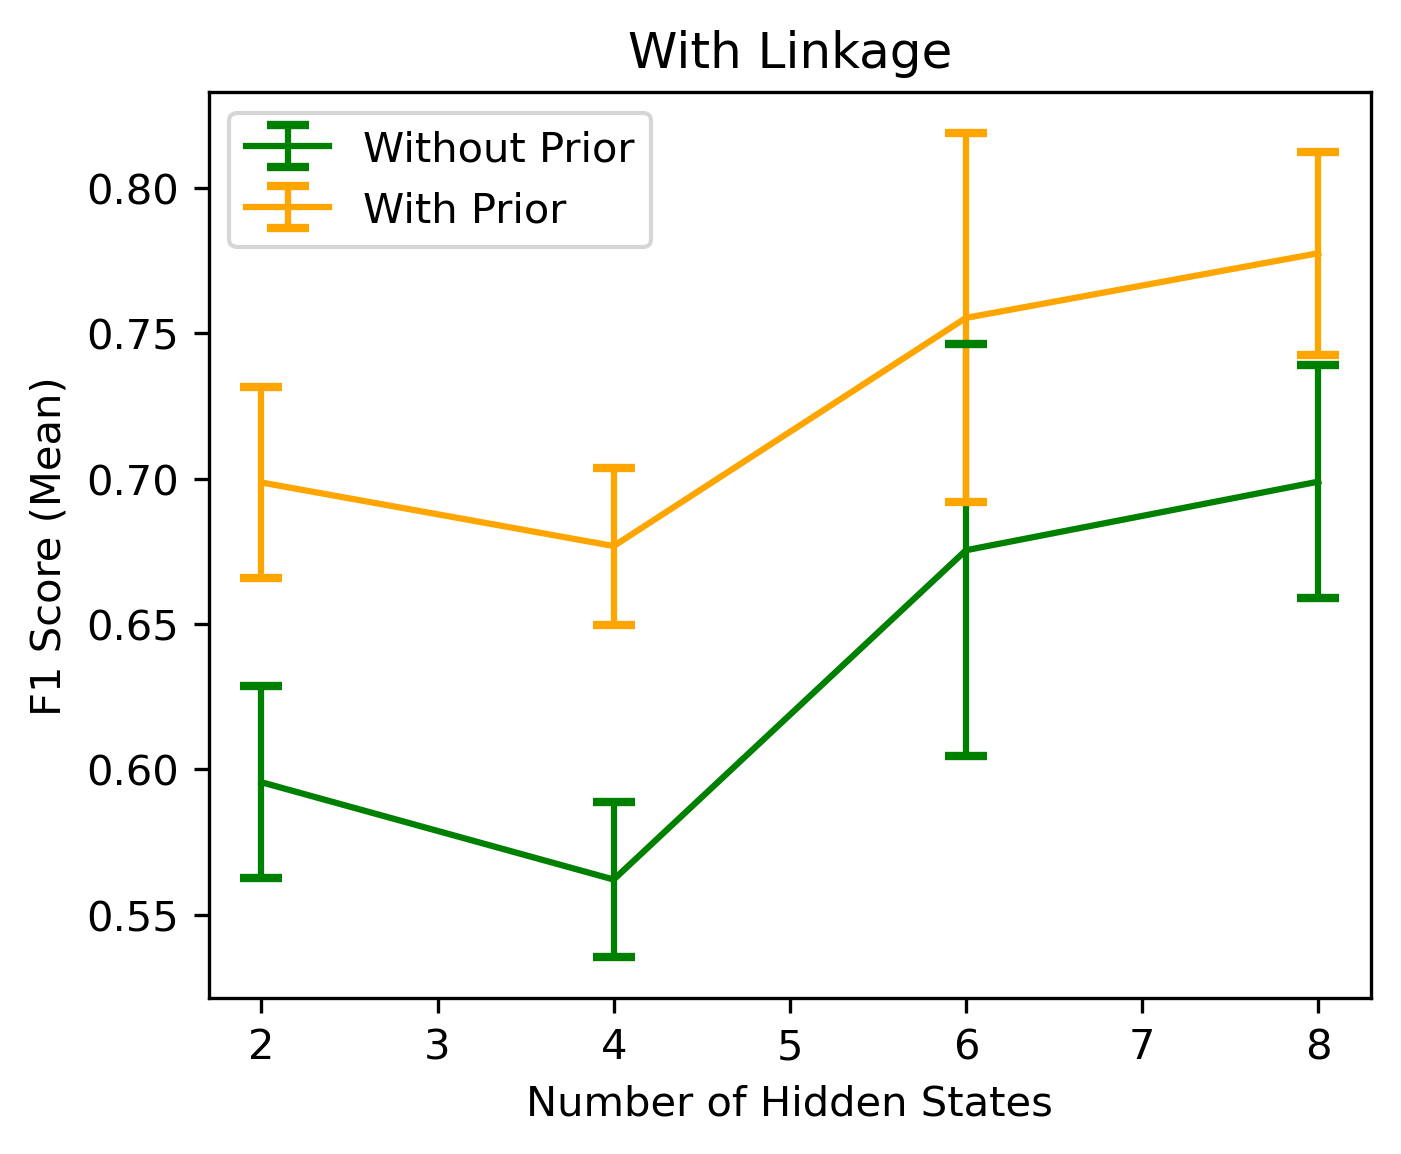

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
edge_h2 = pickle.load(open('Saved/2-Class/eval-states_2_folds_5_use_edge-20201202-171820-model.pkl', 'rb'))['Metrics']
edge_h4 = pickle.load(open('Saved/2-Class/eval-states_4_folds_5_use_edge-20201202-171820-model.pkl', 'rb'))['Metrics']
edge_h6 = pickle.load(open('Saved/2-Class/eval-states_6_folds_5_use_edge-20201202-171820-model.pkl', 'rb'))['Metrics']
edge_h8 = pickle.load(open('Saved/2-Class/eval-states_8_folds_5_use_edge-20201202-171820-model.pkl', 'rb'))['Metrics']


edge_h2_f1 = edge_h2['Normal']['F1'][4][0]
edge_h2_prior_f1 = edge_h2['Posterior']['F1'][4][0]
edge_h4_f1 = edge_h4['Normal']['F1'][4][0]
edge_h4_prior_f1 = edge_h4['Posterior']['F1'][4][0]
edge_h6_f1 = edge_h6['Normal']['F1'][4][0]
edge_h6_prior_f1 = edge_h6['Posterior']['F1'][4][0]
edge_h8_f1 = edge_h8['Normal']['F1'][4][0]
edge_h8_prior_f1 = edge_h8['Posterior']['F1'][4][0]

edge_h2_f1_error = edge_h2['Normal']['F1'][4][1] * 0.87653
edge_h2_prior_f1_error = edge_h2['Posterior']['F1'][4][1] * 0.87653
edge_h4_f1_error = edge_h4['Normal']['F1'][4][1] * 0.87653
edge_h4_prior_f1_error = edge_h4['Posterior']['F1'][4][1] * 0.87653
edge_h6_f1_error = edge_h6['Normal']['F1'][4][1] * 0.87653
edge_h6_prior_f1_error = edge_h6['Posterior']['F1'][4][1] * 0.87653
edge_h8_f1_error = edge_h8['Normal']['F1'][4][1] * 0.87653
edge_h8_prior_f1_error = edge_h8['Posterior']['F1'][4][1] * 0.87653



states = [2, 4, 6, 8]
edge_f1s = [edge_h2_f1, edge_h4_f1, edge_h6_f1, edge_h8_f1]
edge_f1s_error = [edge_h2_f1_error, edge_h4_f1_error, edge_h6_f1_error, edge_h8_f1_error]
edge_f1s_prior = [edge_h2_prior_f1, edge_h4_prior_f1, edge_h6_prior_f1, edge_h8_prior_f1]
edge_f1s_prior_error = [edge_h2_prior_f1_error, edge_h4_prior_f1_error, edge_h6_prior_f1_error, edge_h8_prior_f1_error]

plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["errorbar.capsize"] = 5

plt.figure()
plt.errorbar(states, edge_f1s, yerr=edge_f1s_error, color='green', ecolor='green', capthick=2, label='Without Prior')
plt.errorbar(states, edge_f1s_prior, yerr=edge_f1s_prior_error, color='orange', ecolor='orange', capthick=2, label='With Prior')
plt.xticks(range(2, 9))
plt.xlabel('Number of Hidden States')
plt.ylabel('F1 Score (Mean)')
plt.title('With Linkage')
plt.legend()
plt.show()

